## Análisis de posición de mecanismo Manivela-balancín

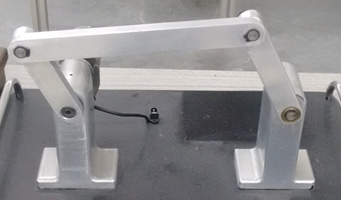

### Análisis vectorial

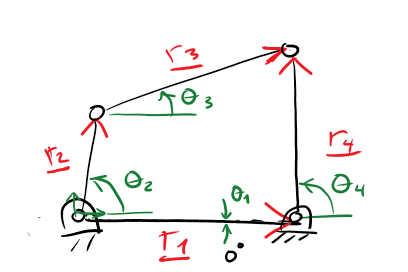

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}+\overrightarrow{r_{3}}-\overrightarrow{r_{4}}-\overrightarrow{r_{1}}=0$

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})+r3\cdot cos(\theta_{3})-r4\cdot cos(\theta_{4})-r1\cdot cos(\theta_{1})=0$,

$r2\cdot sin(\theta_{2})+r3\cdot sin(\theta_{3})-r4\cdot sin(\theta_{4})-r1\cdot sin(\theta_{1})=0$

El problema ahora consiste en resolver este sistema de ecuaciones NO LINEAL. Para esto usaremos el módulo de optimización de Scipy, específicamente la función fsolve.

### Solución

Primero importamos los módulos necesarios:
1. numpy para operaciones numéricas
2. matplotlib.pyplot para gráficas
3. fsolve de scipy.optimize para resolver el sistema de ecuaciones no lineal

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Al final necesitaremos animaciones, por lo cual importamos funcAnimation de matplotlib.animation

In [110]:
from matplotlib.animation import FuncAnimation

Luego declaramos la función

In [111]:
def manivela_balancin(x0):
    #parámetros
    global r2,r3,r4,r1,th1
    #variable de entrada
    global th2
    
    th3 = x0[0]
    th4 = x0[1]
    
    Y = np.zeros(2)
    Y[0] = r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1*np.cos(th1);
    Y[1] = r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1*np.sin(th1);
    
    return Y
    pass

Luego el programa principal.

Empezamos por definir las variables globales

In [112]:
global r2,r3,r4,r1,th1
global th2

le damos valores a los parámetros y variables

In [113]:
r2 = 60
r3 = 150
r4 = 100 
r1 = 160 
th1 = 0

Declaramos las condiciones iniciales

In [114]:
th2 = np.deg2rad(69)

th3 = np.deg2rad(17)
th4 = np.deg2rad(87)

x0 = np.array([th3,th4])

...y probamos la función

In [115]:
Y = manivela_balancin(x0)
print(Y)

[-0.28580526  0.00762782]


si el resultado es un array con valores cercanos a cero, la implementación del análisis está bien. Como regla, si el valor entero es 0, sirve.

Ahora especificamos el número de iteraciones

In [116]:
numpos = 50

Luego definimos el vector que contiene los valores de la variable de entrada que queremos analizar

In [117]:
TH2 = np.linspace(0,2*np.pi,numpos)

Y continuamos con el resto del programa. Esto al fin y al cabo es una prueba.

In [118]:
TH3 = np.zeros(numpos)
TH4 = np.zeros(numpos)
EXITFLAG = np.zeros(numpos)

Probar fsolve

In [119]:
q = fsolve(manivela_balancin,x0)
print(np.rad2deg(q))

[17.00281488 87.1652031 ]


esto debe dar valores de las variables secundarias, verificar con análisis gráfico

## Solución al sistema de ecuaciones con fsolve

In [120]:
for i in range(0,numpos):
    th2 = TH2[i]
    q,info,EXITFLAG[i],mensaje = fsolve(manivela_balancin,x0, full_output = True)
    TH3[i] = q[0]
    TH4[i] = q[1]
    x0 = np.array(q)
    if EXITFLAG[i] != 1:
        print('Error en la iteración ' + str(i))
        break
if i+1 == numpos:
    print('se ejecutaron todas las iteraciones: ' + str(numpos))

se ejecutaron todas las iteraciones: 50


Se realiza este proceso (linea 6) para hacer una copia del VALOR de la variable q y evitar problemas por MUTACIÓN

El condicional IF de la línea 7 se incluye para que el ciclo se detenga en caso de no haber convergencia. Si todo sale bien, el vector EXITFLAG estará lleno de valores 1.

El condicional de la línea 10 verifica que se hayan ejecutado todas las iteraciones planteadas.

## Creación de gráficas

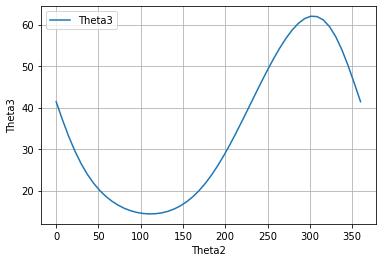

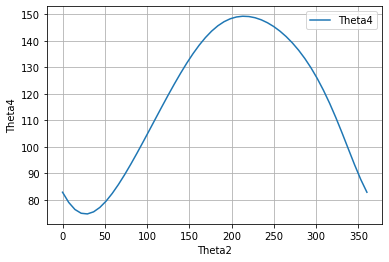

In [121]:
plt.figure()
plt.plot(np.rad2deg(TH2),np.rad2deg(TH3))
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(TH2),np.rad2deg(TH4))
plt.legend(["Theta4"])
plt.xlabel("Theta2")
plt.ylabel("Theta4")
plt.grid()

## Ubicación de puntos para animación

In [122]:
Ox = 0
Oy = 0
Ax = r2*np.cos(TH2)
Ay = r2*np.sin(TH2)
Bx = Ax + r3*np.cos(TH3)
By = Ay + r3*np.sin(TH3)
Cx = r1*np.cos(th1)
Cy = r1*np.sin(th1)

## Preparación de animación

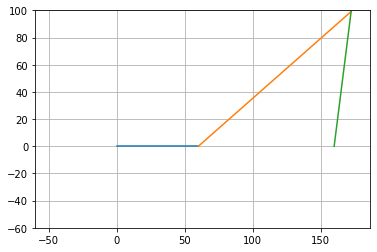

In [123]:
fig = plt.figure()
hr2 = plt.plot([Ox,Ax[0]],[Oy,Ay[0]])
hr3 = plt.plot([Bx[0],Ax[0]],[By[0],Ay[0]])
hr4 = plt.plot([Cx,Bx[0]],[Cy,By[0]])
plt.axis("scaled")
plt.xlim(-r2,np.amax(Bx))
plt.ylim(-r2,r4)
plt.grid()
plt.draw() 

## Animación

Definimos la función que dibuja cada cuadro (plot)

In [124]:
def animar(i):
    manivelaX = np.array([Ox,Ax[i]])
    manivelaY = np.array([Oy,Ay[i]])
    acopladorX = np.array([Bx[i],Ax[i]])
    acopladorY = np.array([By[i],Ay[i]])
    balancinX = np.array([Cx,Bx[i]])
    balancinY = np.array([Cy,By[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hr4[0].set_xdata(balancinX)
    hr4[0].set_ydata(balancinY)

luego creamos la animación. Para mostrarla en Jupyter se genera un archivo GIF

In [125]:
animacion = FuncAnimation(fig, animar, interval=3000/numpos, save_count=numpos)

El número 3000 en interval representa 3000 ms, osea 3 segundos, dividido el numero de posiciones, esto para hacer que la animación se ejecute en 3 segundos.

Ahora para generar GIF visualizable en Github

In [126]:
animacion.save('animacion.gif')

y se visualiza en una celda Markdown así (no funciona en Github):
![SegmentLocal](animacion.gif "segment")

Si se necesita visualizar en una celda de código, se usa lo siguiente:

In [127]:
from IPython.display import Image
Image(url='animacion.gif')  

Si se desea generar un video para exportar la animación, descomente la siguiente línea:

In [128]:
# animacion.save('mecanismo.mpg', writer="ffmpeg", fps=25, dpi=350)

Si se desea visualizar en un frame HTML5 para animaciones que queden muy pesadas en GIF (descomentar para publicación en NBViewer):

In [129]:
from IPython.display import HTML
HTML(animacion.to_html5_video())